## Pymaceuticals Inc.
### - Capomulin and Ramicane were the only one effective in reducing tumor size by around 10 mm3. Other drugs increased it by atleast 15 mm3 to almost 25 mm3.
### - Capomulin and Ramicane showed the lowest of spread of cancer the with lower than 1.5 matastatic sites. Other drugs showed higher than 1.5 metastatic sites and highest at around 3.0 metastatic sites.
### - Capomulin and Ramicane boasts a 80% survival rate. Other drugs range from 60% to lowest of around 30%.

In [53]:
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
import pandas as pd

df_clinic = pd.read_csv("clinicaltrial_data.csv")
df_mouse = pd.read_csv("mouse_drug_data.csv")

df = pd.merge(df_clinic,df_mouse,on='Mouse ID')
markers = ['.',",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_"]
drug_names = df.Drug.unique()

## Tumor Response to Treament

In [54]:
df_tumor = df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
df_tumor = df_tumor.reset_index(['Drug','Timepoint'])

tumor_vol = [df_tumor.loc[df_tumor['Drug'] == i]['Tumor Volume (mm3)'] for i in drug_names]

df_tumor_final = pd.DataFrame({drug_names[i]: tumor_vol[i] for i in range(len(drug_names))})
df_tumor_final['Timepoint'] = df_tumor['Timepoint']
df_tumor_final = df_tumor_final.groupby('Timepoint').mean()
df_tumor_final

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


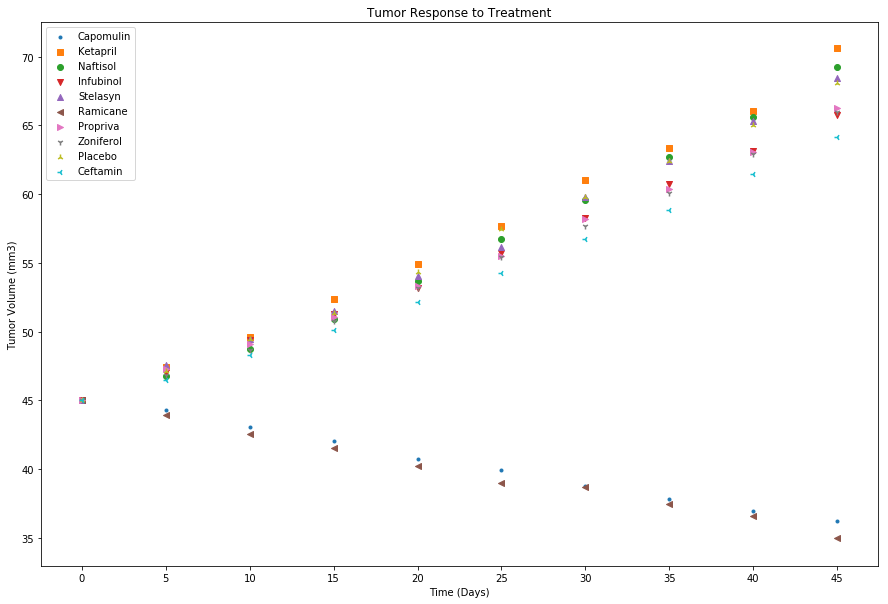

In [55]:
df_tumor_x = list(df_tumor_final.index.values)
df_tumor_y = []

plt.figure(figsize=(15,10))
for i in range(len(drug_names)):
    df_tumor_y.append(list(df_tumor.loc[df_tumor['Drug'] == drug_names[i]]['Tumor Volume (mm3)']))
    plt.scatter(df_tumor_x,df_tumor_y[i],marker=markers[i],label=drug_names[i])

plt.legend(loc='best')
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(list(df_tumor_x))
plt.show()

## Metastatic Response to Treatment

In [56]:
df_meta = df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
df_meta = df_meta.reset_index(['Drug','Timepoint'])

meta_sites = [df_meta.loc[df_meta['Drug'] == i]['Metastatic Sites'] for i in drug_names]

df_meta_final = pd.DataFrame({drug_names[i]: meta_sites[i] for i in range(len(drug_names))})
df_meta_final['Timepoint'] = df_meta['Timepoint']
df_meta_final = df_meta_final.groupby('Timepoint').mean()
df_meta_final

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


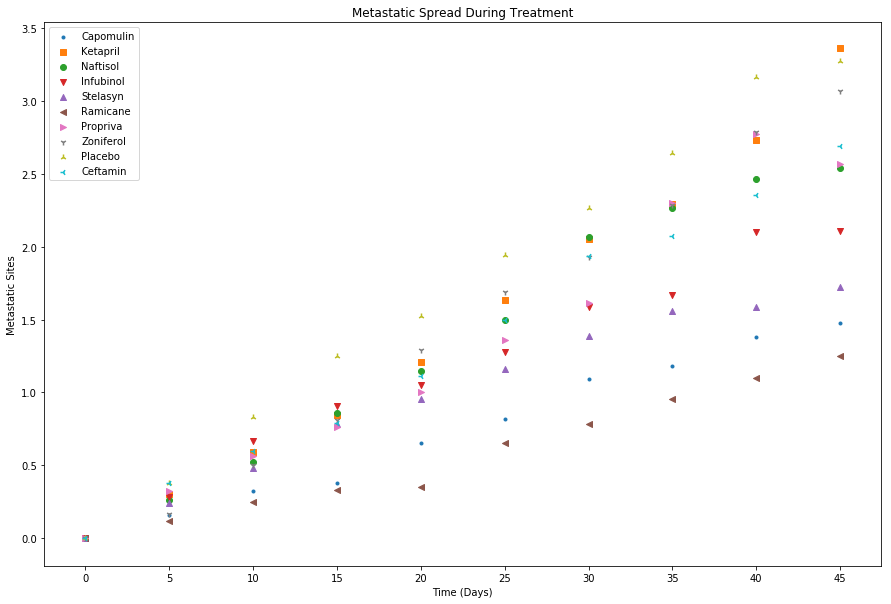

In [57]:
df_meta_x = list(df_meta_final.index.values)
df_meta_y = []

plt.figure(figsize=(15,10))
for i in range(len(drug_names)):
    df_meta_y.append(list(df_meta.loc[df_meta['Drug'] == drug_names[i]]['Metastatic Sites']))
    plt.scatter(df_meta_x,df_meta_y[i],marker=markers[i],label=drug_names[i])
     
plt.legend(loc='best')
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.xticks(list(df_meta_x))
plt.show()

## Survival Rates

In [58]:
df_live = df.groupby(['Drug','Timepoint'])['Mouse ID'].count()
df_live = df_live.reset_index(['Drug','Timepoint'])

alive_mouse = [df_live.loc[df_live['Drug'] == i]['Mouse ID'] for i in drug_names]

df_live_final = pd.DataFrame({drug_names[i]: alive_mouse[i] for i in range(len(drug_names))})
df_live_final['Timepoint'] = df_live['Timepoint']
df_live_final = df_live_final.groupby('Timepoint').mean()
df_live_final

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25.0,25.0,25.0,25.0,25.0,25.0,26.0,25.0,26.0,25.0
5,25.0,21.0,25.0,23.0,23.0,24.0,25.0,25.0,25.0,24.0
10,25.0,20.0,21.0,22.0,21.0,24.0,23.0,24.0,23.0,22.0
15,24.0,19.0,21.0,19.0,21.0,20.0,17.0,24.0,23.0,21.0
20,23.0,18.0,20.0,19.0,20.0,19.0,17.0,23.0,21.0,17.0
25,22.0,18.0,18.0,19.0,18.0,17.0,14.0,23.0,19.0,16.0
30,22.0,16.0,17.0,18.0,15.0,15.0,13.0,23.0,18.0,15.0
35,22.0,14.0,12.0,17.0,15.0,14.0,10.0,21.0,16.0,14.0
40,21.0,14.0,10.0,15.0,15.0,12.0,9.0,20.0,12.0,14.0


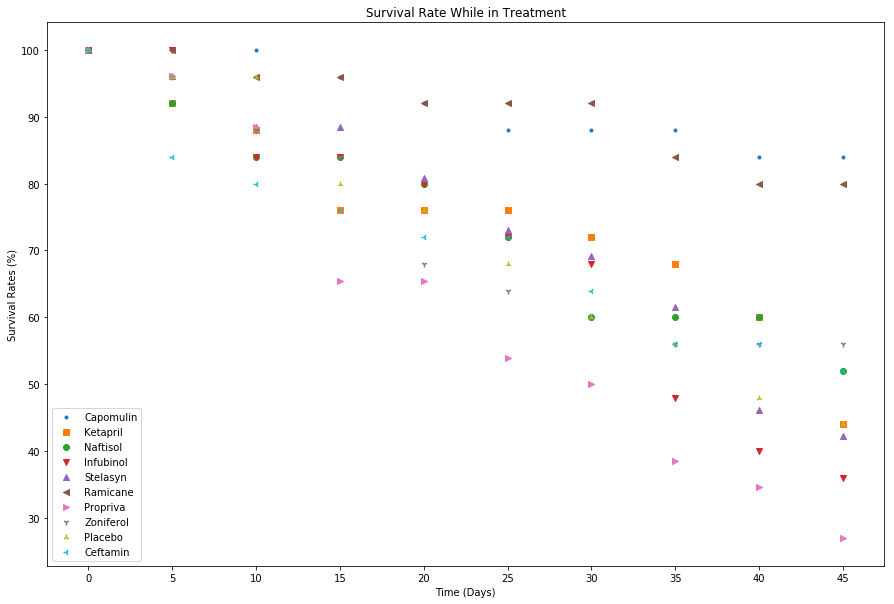

In [59]:
df_live_x = list(df_live_final.index.values)
df_live_y = []

plt.figure(figsize=(15,10))
for i in range(len(drug_names)):
    df_live_y.append(list(map(lambda x: x/max(df_live.loc[df_live['Drug'] == drug_names[i]]['Mouse ID']) * 100, df_live.loc[df_live['Drug'] == drug_names[i]]['Mouse ID'])))
    plt.scatter(df_live_x,df_live_y[i],marker=markers[i],label=drug_names[i])
    
plt.legend(loc='best')
plt.title("Survival Rate While in Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rates (%)")
plt.xticks(list(df_live_x))
plt.show()

## Summary Bar Graph

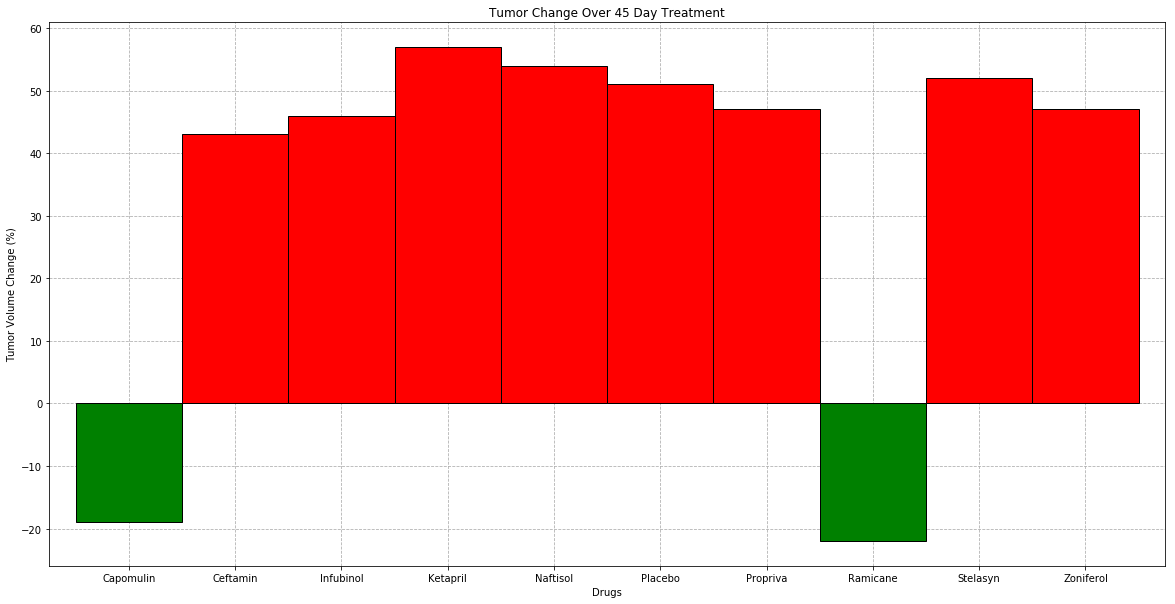

In [60]:
df_tumor_change = round((df_tumor_final.iloc[9]-df_tumor_final.iloc[0])/df_tumor_final.iloc[0]*100)
df_tumor_change_x = list(range(len(df_tumor_change)))
colors = ['r' if i>0 else 'g' for i in df_tumor_change] 
        
df_tumor_change_plot = df_tumor_change.plot(x=list(range(len(df_tumor_change))),kind="bar",figsize=(20,10),color=colors,rot=0,
                                            width=1,zorder=3,title="Tumor Change Over 45 Day Treatment",edgecolor='black')

#plt.text(s="ayy",x=1,y=5)
plt.grid(linestyle='--',zorder=0)        
plt.xlabel("Drugs")
plt.ylabel("Tumor Volume Change (%)")
plt.show()